In [15]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df1 = pd.read_excel('A2-SET-TO-ANNOTATE_Mohammed.xlsx')
df2 = pd.read_excel('A2-SET-TO-ANNOTATE.xlsx')

df1 = df1.dropna()
df2 = df2.dropna()


In [17]:
df1.head()


id                                               text  \
0  NaN                                                NaN   
1  id1  #California is full of white trash who moved f...   
2  id2  #Dutch people who live outside of #NewYorkCity...   
3  id3  #ShutdownJNU Pls dnt take police actn ths tym....   
4  id4  #ShutDownJNU They should be hanged summarily. ...   

  l_Gibert(HATE/NOHATE) l_Kumar(CAG/NAG/OAG) l_Zamp(OFF/NON)  \
0                   NaN                  NaN             NaN   
1                  HATE                  OAG             OFF   
2                  HATE                  OAG             OFF   
3                  HATE                  OAG             OFF   
4                  HATE                  OAG             OFF   

  l_Zamp(TARG/NOTARG) l_Zamp(G/I/O)  
0                 NaN           NaN  
1                TARG             G  
2                TARG             G  
3                TARG             G  
4                TARG             G

In [18]:
df2.head()

id                                               text  \
0  NaN                                                NaN   
1  id1  #California is full of white trash who moved f...   
2  id2  #Dutch people who live outside of #NewYorkCity...   
3  id3  #ShutdownJNU Pls dnt take police actn ths tym....   
4  id4  #ShutDownJNU They should be hanged summarily. ...   

  l_Gibert(HATE/NOHATE) l_Kumar(CAG/NAG/OAG) l_Zamp(OFF/NON)  \
0                   NaN                  NaN             NaN   
1                  HATE                  OAG             OFF   
2                  HATE                  OAG             OFF   
3                  HATE                  CAG             OFF   
4                  HATE                  CAG             OFF   

  l_Zamp(TARG/NOTARG) l_Zamp(G/I/O)  
0                 NaN           NaN  
1                TARG             G  
2                TARG             G  
3                TARG             O  
4                TARG             G

In [19]:
labels1 = (df1['l_Gibert(HATE/NOHATE)']).dropna()
labels2 = (df2['l_Gibert(HATE/NOHATE)']).dropna()
confusion_matrix1 = confusion_matrix(labels1, labels2)


In [20]:
print(labels1.unique(),
     labels2.unique())
confusion_matrix1

['HATE' 'NOHATE'] ['HATE' 'NOHATE']


array([[18,  0],
       [14, 12]], dtype=int64)

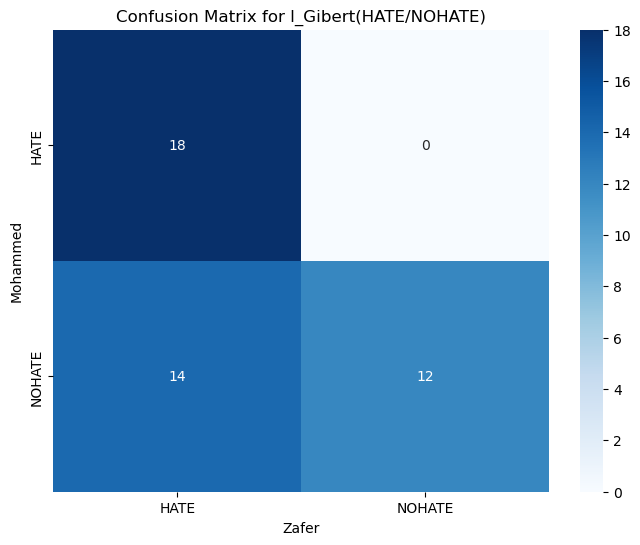

In [21]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=labels1.unique(), yticklabels=labels1.unique())
plt.xlabel('Zafer')
plt.ylabel('Mohammed')
plt.title('Confusion Matrix for l_Gibert(HATE/NOHATE)')
plt.show()

In [22]:
labels1 = (df1['l_Kumar(CAG/NAG/OAG)']).dropna()
labels2 = (df2['l_Kumar(CAG/NAG/OAG)']).dropna()
confusion_matrix1 = confusion_matrix(labels1, labels2)

In [23]:
print(labels1.unique(),
     labels2.unique())
confusion_matrix1

['OAG' 'CAG' 'NAG'] ['OAG' 'CAG' 'NAG']


array([[ 8,  0,  2],
       [ 4,  6,  3],
       [ 4,  0, 17]], dtype=int64)

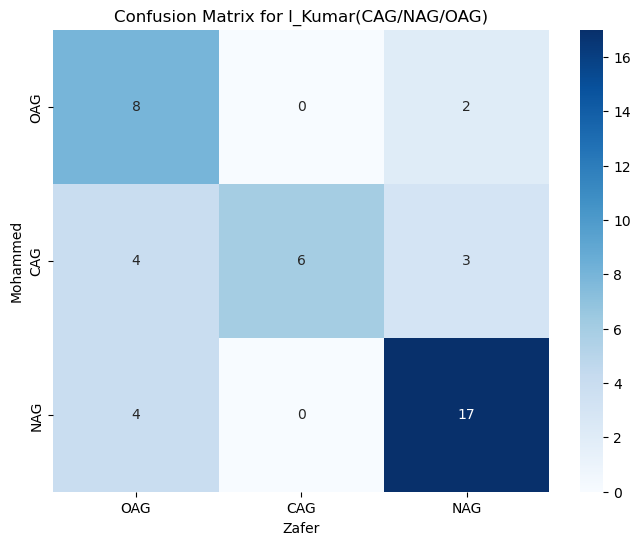

In [24]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=labels1.unique(), yticklabels=labels2.unique())
plt.xlabel('Zafer')
plt.ylabel('Mohammed')
plt.title('Confusion Matrix for l_Kumar(CAG/NAG/OAG)')
plt.show()

In [25]:
labels1 = (df1['l_Zamp(OFF/NON)']).dropna()

df2['l_Zamp(OFF/NON)'] = df2['l_Zamp(OFF/NON)'].replace('NON ', 'NON')
labels2 = (df2['l_Zamp(OFF/NON)']).dropna()
confusion_matrix1 = confusion_matrix(labels1, labels2)

In [26]:
print(labels1.unique(),
     labels2.unique())
confusion_matrix1

['OFF' 'NON'] ['OFF' 'NON']


array([[11,  4],
       [ 1, 28]], dtype=int64)

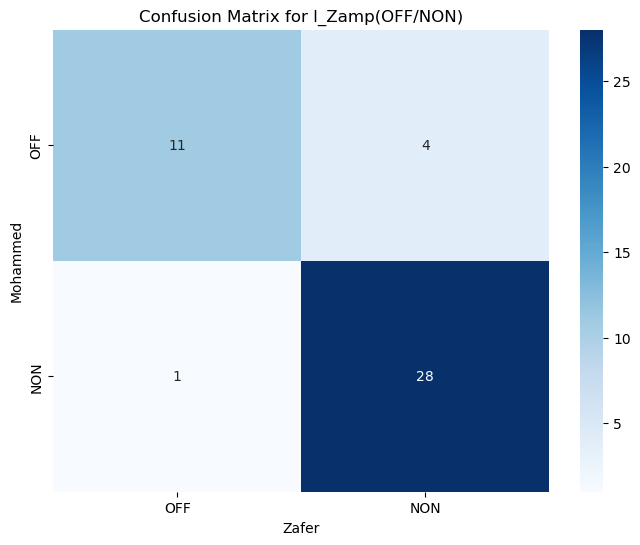

In [27]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=labels1.unique(), yticklabels=labels1.unique())
plt.xlabel('Zafer')
plt.ylabel('Mohammed')
plt.title('Confusion Matrix for l_Zamp(OFF/NON)')
plt.show()

In [65]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score

# Load the dataframes (assuming you have already loaded df1 and df2 as shown in your code)
# ...

# Define a function to calculate Cohen's Kappa and percentage agreement
def calculate_agreement(labels1, labels2):
    # Calculate the confusion matrix
    confusion_matrix1 = confusion_matrix(labels1, labels2)
    
    # Calculate Cohen's Kappa
    kappa = cohen_kappa_score(labels1, labels2)
    
    # Calculate percentage agreement
    total_annotations = len(labels1)
    agreement_count = sum(confusion_matrix1.diagonal())
    percentage_agreement = (agreement_count / total_annotations) * 100.0
    
    return kappa, percentage_agreement

# Example usage for l_Gibert(HATE/NOHATE) category
labels1 = df1['l_Kumar(CAG/NAG/OAG)'].dropna()
labels2 = df2['l_Kumar(CAG/NAG/OAG)'].dropna()

kappa, percentage_agreement = calculate_agreement(labels1, labels2)

print("Cohen's Kappa:", kappa)
print("Percentage Agreement:", percentage_agreement, "%")


Cohen's Kappa: 0.5372168284789645
Percentage Agreement: 70.45454545454545 %


# Error Analysis

In [117]:
# non agreement data
disagreements = df1[df1.columns[2:]] != df2[df1.columns[2:]]


# subset rows with any disagreements
disagree_rows = df1[disagreements.any(axis=1)]

disagreements.iloc[0]['l_Gibert(HATE/NOHATE)']
disagreements.head(7)

id                                               text  \
0  NaN                                                NaN   
3  id3  #ShutdownJNU Pls dnt take police actn ths tym....   
4  id4  #ShutDownJNU They should be hanged summarily. ...   
5  id5  4 people died and Indian express finds humour ...   
6  id6  Am I the only one who is not bothered by the m...   
7  id7  At the time of prophet Muhammad there was no e...   
8  id8  data centres and the protectionism?? completel...   

  l_Gibert(HATE/NOHATE) l_Kumar(CAG/NAG/OAG) l_Zamp(OFF/NON)  \
0                   NaN                  NaN             NaN   
3                  HATE                  OAG             OFF   
4                  HATE                  OAG             OFF   
5                NOHATE                  CAG             NON   
6                NOHATE                  NAG             NON   
7                NOHATE                  CAG             OFF   
8                NOHATE                  NAG             NON   

  l_Zamp(TARG/NOTARG) l_Zamp(G/I/O)  
0                 NaN           NaN  
3                TARG             G  
4                TARG             G  
5                 NaN           NaN  
6                 NaN           NaN  
7                TARG             G  
8                 NaN           NaN

In [118]:
disagree_rows.head(7)

id                                               text  \
0  NaN                                                NaN   
3  id3  #ShutdownJNU Pls dnt take police actn ths tym....   
4  id4  #ShutDownJNU They should be hanged summarily. ...   
5  id5  4 people died and Indian express finds humour ...   
6  id6  Am I the only one who is not bothered by the m...   
7  id7  At the time of prophet Muhammad there was no e...   
8  id8  data centres and the protectionism?? completel...   

  l_Gibert(HATE/NOHATE) l_Kumar(CAG/NAG/OAG) l_Zamp(OFF/NON)  \
0                   NaN                  NaN             NaN   
3                  HATE                  OAG             OFF   
4                  HATE                  OAG             OFF   
5                NOHATE                  CAG             NON   
6                NOHATE                  NAG             NON   
7                NOHATE                  CAG             OFF   
8                NOHATE                  NAG             NON   

  l_Zamp(TARG/NOTARG) l_Zamp(G/I/O)  
0                 NaN           NaN  
3                TARG             G  
4                TARG             G  
5                 NaN           NaN  
6                 NaN           NaN  
7                TARG             G  
8                 NaN           NaN

In [135]:
for _, row in disagree_rows.iterrows():
    print(row['text'])
    for col in df1.columns[2:]:
        ann_1 = row[col]
        ann_2 = df2.loc[_, col]
        print(f"{col}: Annotator1 - {ann_1}, Annotator2 - {ann_2} {'*' if ann_1 != ann_2 else ''}")

    print('\n')


nan
l_Gibert(HATE/NOHATE): Annotator1 - nan, Annotator2 - nan *
l_Kumar(CAG/NAG/OAG): Annotator1 - nan, Annotator2 - nan *
l_Zamp(OFF/NON): Annotator1 - nan, Annotator2 - nan *
l_Zamp(TARG/NOTARG): Annotator1 - nan, Annotator2 - nan *
l_Zamp(G/I/O): Annotator1 - nan, Annotator2 - nan *


#ShutdownJNU Pls dnt take police actn ths tym. Send paramilitary to hunt down these bastards
l_Gibert(HATE/NOHATE): Annotator1 - HATE, Annotator2 - HATE 
l_Kumar(CAG/NAG/OAG): Annotator1 - OAG, Annotator2 - CAG *
l_Zamp(OFF/NON): Annotator1 - OFF, Annotator2 - OFF 
l_Zamp(TARG/NOTARG): Annotator1 - TARG, Annotator2 - TARG 
l_Zamp(G/I/O): Annotator1 - G, Annotator2 - O *


#ShutDownJNU They should be hanged summarily. ISIS justice maybe has some merit? 
l_Gibert(HATE/NOHATE): Annotator1 - HATE, Annotator2 - HATE 
l_Kumar(CAG/NAG/OAG): Annotator1 - OAG, Annotator2 - CAG *
l_Zamp(OFF/NON): Annotator1 - OFF, Annotator2 - OFF 
l_Zamp(TARG/NOTARG): Annotator1 - TARG, Annotator2 - TARG 
l_Zamp(G/I/O): Annotat